In [1]:
import pandas as pd
import seaborn as sns
from datetime import timedelta
import numpy as np

In [2]:
df = pd.read_csv('TUR_norm_per_instrument_2020-02-20.csv')
df.head()

,date,daily_TUR_rp,n_serial_adj,n_sites,TUR,n_win,TUR_per_inst,sd_inst_1yr,date_n,mean_inst_reg,sd_inst_reg,TUR_norm_inst_reg
0,1/1/2013,72,18.956581,8,1101,21,58.080094,11.928938,15706,60.712710,12.456924,-0.211338
1,1/2/2013,89,20.957784,9,1155,21,55.110789,12.004393,15707,60.684320,12.457992,-0.447386
2,1/3/2013,90,20.959079,9,1213,21,57.874680,12.079393,15708,60.655954,12.459057,-0.223233
3,1/4/2013,70,20.960298,9,1264,21,60.304487,12.149865,15709,60.627614,12.460118,-0.025933
4,1/5/2013,49,20.960543,9,1349,21,64.359021,12.169529,15710,60.599298,12.461176,0.301715


In [73]:
# delta = timedelta(days=45)
# type(delta)
# df_score_mean = df.apply(lambda x: np.mean(df['n_sites'][df['date'] <= x['date'] + str(delta)]), axis=1)

In [ ]:
df.loc[df['n_sites'].idxmax()]

In [74]:
df_dt = df[['date','n_sites']]
# df_dt

In [75]:
df_dt['datetime'] = pd.to_datetime(df_dt['date'])
df_dt = df_dt.set_index('datetime')
df_dt.drop(['date'], axis=1, inplace=True)
# df_dt.head()

C:\Users\Suyash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_dt['rolling_sum'] = df_dt.rolling(45).sum()
df_dt.head(10)

,n_sites,rolling_sum
datetime,,
2013-01-01,8,NaN
2013-01-02,9,NaN
2013-01-03,9,NaN
2013-01-04,9,NaN
2013-01-05,9,NaN
2013-01-06,9,NaN
2013-01-07,9,NaN
2013-01-08,9,NaN
2013-01-09,9,NaN


In [77]:
df_dt['rolling_sum_backfilled'] = df_dt['rolling_sum'].fillna(method='backfill')
df_dt.head(10)

,n_sites,rolling_sum,rolling_sum_backfilled
datetime,,,
2013-01-01,8,NaN,439.0
2013-01-02,9,NaN,439.0
2013-01-03,9,NaN,439.0
2013-01-04,9,NaN,439.0
2013-01-05,9,NaN,439.0
2013-01-06,9,NaN,439.0
2013-01-07,9,NaN,439.0
2013-01-08,9,NaN,439.0
2013-01-09,9,NaN,439.0


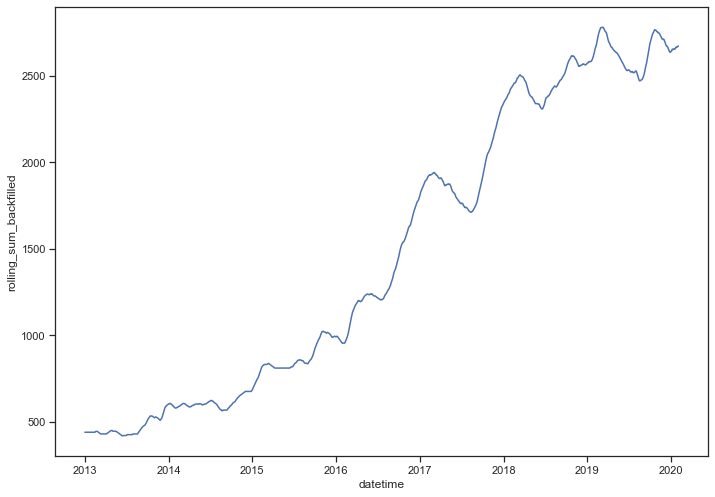

In [82]:
from matplotlib import pyplot

df_dt['datetime'] = df_dt.index
sns.set_style("white")
sns.set_style("ticks")
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(x='datetime', y='rolling_sum_backfilled', data=df_dt)
plt.savefig('output.png')

## Number of sites summed per day

In [68]:
da = pd.read_csv('RP_MDATA_20200212D.csv')
da.head()

C:\Users\Suyash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RunDataID,StartTime,InstrumentSerialNumber,FlaggedAsValidation,InstitutionID,ZipCode,TargetName,TargetShortName,AssayName,ResultType,TargetResult,AssayResult,Region,Country,InstrumentVersion,PouchTitle
0,gAAAAABeRDlA1uR4ySzpV1fYgPvMPQoOCrFGtbiW6lR4H5...,2015-11-11 04:20:08.000,gAAAAABeRDnh3jSZXVlnGwF2Z7ZzTyppxHdkZRWLZQ4skg...,0,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,46601,PCR1 Control,NaN,PCR1,control,Pass,Positive,IN,United States of America,FA1.5,Respiratory_Panel
1,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,2015-11-11 05:16:06.000,gAAAAABeRDnh3jSZXVlnGwF2Z7ZzTyppxHdkZRWLZQ4skg...,0,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,46601,PCR1 Control,NaN,PCR1,control,Pass,Positive,IN,United States of America,FA1.5,Respiratory_Panel
2,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,2015-11-11 05:16:06.000,gAAAAABeRDnh3jSZXVlnGwF2Z7ZzTyppxHdkZRWLZQ4skg...,0,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,46601,PCR2 Control,NaN,PCR2,control,Pass,Positive,IN,United States of America,FA1.5,Respiratory_Panel
3,gAAAAABeRDlAjVwEe6vAvWtvxuU6KWLE4iSKLNrJNnRjGx...,2015-11-12 06:51:43.000,gAAAAABeRDnh3jSZXVlnGwF2Z7ZzTyppxHdkZRWLZQ4skg...,0,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,46601,PCR1 Control,NaN,PCR1,control,Pass,Positive,IN,United States of America,FA1.5,Respiratory_Panel
4,gAAAAABeRDlAjVwEe6vAvWtvxuU6KWLE4iSKLNrJNnRjGx...,2015-11-12 06:51:43.000,gAAAAABeRDnh3jSZXVlnGwF2Z7ZzTyppxHdkZRWLZQ4skg...,0,gAAAAABeRDk9Meol3mQtnVm2iyw4NnCbwjYRulSnc4MqGM...,46601,PCR2 Control,NaN,PCR2,control,Pass,Positive,IN,United States of America,FA1.5,Respiratory_Panel


In [69]:
da['StartTime'] = pd.to_datetime(da.StartTime).dt.normalize()

In [78]:
da = da.sort_values(by='StartTime')

In [79]:
da.RunDataID.unique().shape

(807464,)

In [80]:
da_dt = da.groupby(by='StartTime', as_index=False).agg({'RunDataID': pd.Series.nunique})
da_dt.head()

,StartTime,RunDataID
0,2011-08-15,3
1,2011-10-07,4
2,2011-10-10,6
3,2011-10-11,8
4,2011-10-12,14


In [81]:
# da_dt = pd.DataFrame(da_dt.RunDataID)

In [92]:
da_dt['MW_45'] = da_dt.RunDataID.rolling(45,center = True).mean().shift()
da_dt.head()

,StartTime,RunDataID,MW_45
0,2011-08-15,3,NaN
1,2011-10-07,4,NaN
2,2011-10-10,6,NaN
3,2011-10-11,8,NaN
4,2011-10-12,14,NaN


In [89]:
# from matplotlib import pyplot as plt

# plt.figure(figsize = (15,10))
# plt.grid(True)
# # plt.plot(da_dt['RunDataID'],label = 'RunDataID')
# plt.plot(da_dt['MW_45'],label = 'Moving Window 45')

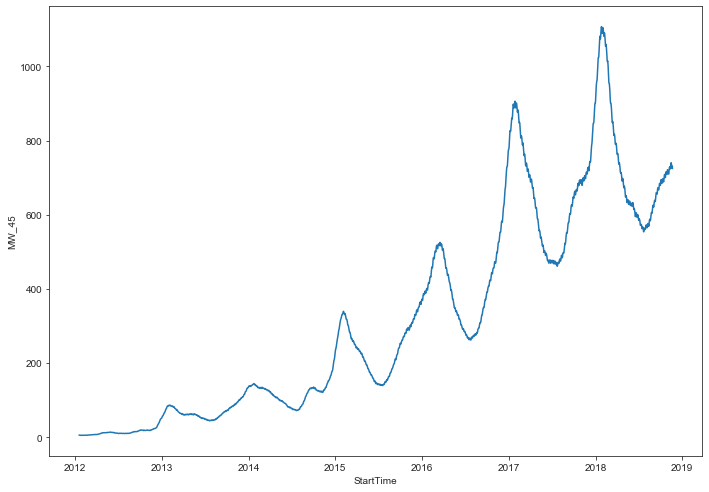

In [90]:
from matplotlib import pyplot

sns.set_style("white")
sns.set_style("ticks")
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(x='StartTime', y='MW_45', data=da_dt)